# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 10.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 12.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 13.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 491 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp25 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [4]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [6]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326627846752768000
1326627846756818944
1326627846807146496
1326627847168020482
1326627847046303746
1326627847209951239
1326627847172202501
1326627847134302208
1326627847482593280
1326627847482433536
1326627847390322689
1326627847386099721
1326627847570681858
1326627847654563851
1326627847897800708
1326627847847342080
1326627848002523136
1326627847960662018
1326627848170295296
1326627848258543617
1326627848329814017
1326627848329850881
1326627848187224065
1326627848459853825
1326627848493309952
1326627848564641793
1326627848539549697
1326627848833159172
1326627848912859136
1326627848983994369
1326627848954634242
1326627849034403841
1326627849105629185
1326627849185488897
1326627849252593666
1326627849051246593
1326627849332092928
1326627849386647552
1326627849365823488
1326627849416175616
1326627849416085506
1326627849642663936
1326627849659314176
1326627849709740033
1326627849852235776
1326627849868988417
1326627849848016896
1326627849760083970
1326627849923538944
1326627848002613261


1326627880323969032
1326627880399495168
1326627880546181120
1326627880600694785
1326627879451561986
1326627880680513538
1326627880688873472
1326627880688885760
1326627880663715841
1326627880659529728
1326627880848158721
1326627880915251201
1326627880974028801
1326627881024249856
1326627881288564736
1326627881250938885
1326627881271910401
1326627881225773056
1326627881368293376
1326627881393541124
1326627881653514248
1326627881590681600
1326627881737310210
1326627881720573952
1326627881917816832
1326627881934524416
1326627882031001600
1326627881431179264
1326627882009911297
1326627882299514880
1326627882299428864
1326627882383400961
1326627882370789382
1326627882333040640
1326627882408538114
1326627882509201411
1326627882467291137
1326627882421145603
1326627882509225986
1326627881607450624
1326627883599720450
1326627883599663106
1326627883805249536
1326627883763249154
1326627883905916931
1326627883801055233
1326627883939471366
1326627884153368578
1326627884115521536
1326627884077887488


1326627914801143814
1326627914830458882
1326627914780086277
1326627914906005505
1326627914847297536
1326627915044327425
1326627915233189888
1326627915224686592
1326627915396681731
1326627915564519425
1326627915577008131
1326627915539374081
1326627915510018048
1326627915304488966
1326627917166743552
1326627917271457793
1326627917288402956
1326627917259038722
1326627917246435330
1326627917481324545
1326627917460348929
1326627917451964416
1326627917518966786
1326627917611360258
1326627917426733069
1326627917783166976
1326627917573578754
1326627917649104896
1326627917976264705
1326627917921722369
1326627917925769216
1326627918190157824
1326627918261448705
1326627918307528706
1326627918370512902
1326627918433320960
1326627918467002370
1326627918852878339
1326627918869655552
1326627919171477504
1326627919033217025
1326627919301578752
1326627919435853825
1326627919389712387
1326627919502979073
1326627919519735809
1326627919574126592
1326627919637065729
1326627919679152130
1326627919746138113


1326627949651636225
1326627949668233216
1326627949676781568
1326627949831987200
1326627950737973252
1326627950779756544
1326627950804959232
1326627950741975040
1326627950893150209
1326627950775726087
1326627951035756544
1326627951048335361
1326627951044128773
1326627951140540416
1326627951304171531
1326627951270629376
1326627951283228674
1326627951345950721
1326627951446777857
1326627951513800704
1326627951438409736
1326627951560044544
1326627951547441153
1326627951719424003
1326627951740325893
1326627951711051778
1326627952008728576
1326627952008679424
1326627952138850304
1326627952143032322
1326627952193282048
1326627952256233473
1326627952113700864
1326627952142868480
1326627952415526912
1326627952285642763
1326627952415690752
1326627952411471872
1326627952482791424
1326627952499458048
1326627952369528832
1326627952641994752
1326627952579272704
1326627952730234885
1326627952675614720
1326627952801406976
1326627953069879296
1326627952935792641
1326627953107677185
1326627953057402880


1326627985261162497
1326627985424834561
1326627985420640257
1326627985441611779
1326627985630269440
1326627985567469568
1326627985626193921
1326627985840070657
1326627985768722437
1326627986032922624
1326627986037207042
1326627985982582785
1326627986058092545
1326627986012065793
1326627986062315521
1326627986200813576
1326627986301460481
1326627986225979394
1326627986460848129
1326627986435567616
1326627986490200066
1326627986687234048
1326627986771218433
1326627986494410752
1326627986922217478
1326627986934800386
1326627986968285184
1326627987018686464
1326627986934648832
1326627987001847809
1326627986938978304
1326627987022864386
1326627987245035520
1326627987207413766
1326627987438010368
1326627987488464897
1326627987429748736
1326627987652030467
1326627987639463943
1326627988545425410
1326627988541239297
1326627988763512834
1326627988977319936
1326627989052817409
1326627989015195649
1326627989128425472
1326627989119971331
1326627989199597568
1326627989262528512
1326627989300408326


1326628020803653632
1326628019956539393
1326628020698968065
1326628020786921472
1326628020921135105
1326628020933648384
1326628020917051394
1326628020753293312
1326628021139349505
1326628021248258049
1326628021248417794
1326628021185503240
1326628021327912960
1326628021185490944
1326628021298749443
1326628021068050433
1326628021491658752
1326628022024347651
1326628022053646336
1326628021986619392
1326628022166941696
1326628022229864450
1326628022229725184
1326628022347247617
1326628022464737283
1326628022133411840
1326628022280200192
1326628022573621249
1326628022410240001
1326628022133395461
1326628022657581056
1326628022649311234
1326628022628339712
1326628022854832130
1326628022800232449
1326628022644928512
1326628022934511617
1326628023051956226
1326628023299272707
1326628023240544256
1326628022863204354
1326628023228108801
1326628023420989444
1326628023580336128
1326628023462846465
1326628023722893312
1326628023714471936
1326628023626571777
1326628023752417282
1326628023882244096


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [7]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [8]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [9]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 11 20:52:30 +0000 2020'
'Wed Nov 11 20:51:50 +0000 2020'
'Wed Nov 11 20:51:04 +0000 2020'
'Wed Nov 11 20:49:04 +0000 2020'
'Wed Nov 11 20:46:29 +0000 2020'
'Wed Nov 11 20:44:41 +0000 2020'
'Wed Nov 11 20:42:18 +0000 2020'
'Wed Nov 11 20:38:24 +0000 2020'
'Wed Nov 11 20:37:59 +0000 2020'
'Wed Nov 11 20:36:48 +0000 2020'
'Wed Nov 11 20:35:38 +0000 2020'
'Wed Nov 11 20:34:41 +0000 2020'
'Wed Nov 11 20:34:35 +0000 2020'
'Wed Nov 11 20:33:18 +0000 2020'
'Wed Nov 11 20:33:18 +0000 2020'
'Wed Nov 11 20:32:59 +0000 2020'
'Wed Nov 11 20:32:47 +0000 2020'
'Wed Nov 11 20:32:26 +0000 2020'
'Wed Nov 11 20:29:56 +0000 2020'
'Wed Nov 11 20:28:32 +0000 2020'
'Wed Nov 11 20:27:26 +0000 2020'
'Wed Nov 11 20:25:01 +0000 2020'
'Wed Nov 11 20:24:05 +0000 2020'
'Wed Nov 11 20:21:47 +0000 2020'
'Wed Nov 11 20:20:17 +0000 2020'
'Wed Nov 11 20:16:41 +0000 2020'
'Wed Nov 11 20:16:05 +0000 2020'
'Wed Nov 11 20:16:05 +0000 2020'
'Wed Nov 11 20:15:31 +0000 2020'
'Wed Nov 11 20:14:42 +0000 2020'
'Wed Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [10]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 11 20:03:40 +0000 2020'
'Wed Nov 11 20:03:28 +0000 2020'
'Wed Nov 11 20:02:35 +0000 2020'
'Wed Nov 11 20:01:59 +0000 2020'
'Wed Nov 11 20:01:12 +0000 2020'
'Wed Nov 11 20:01:11 +0000 2020'
'Wed Nov 11 20:00:57 +0000 2020'
'Wed Nov 11 20:00:28 +0000 2020'
'Wed Nov 11 19:54:33 +0000 2020'
'Wed Nov 11 19:52:54 +0000 2020'
'Wed Nov 11 19:51:20 +0000 2020'
'Wed Nov 11 19:48:32 +0000 2020'
'Wed Nov 11 19:48:13 +0000 2020'
'Wed Nov 11 19:48:01 +0000 2020'
'Wed Nov 11 19:47:31 +0000 2020'
'Wed Nov 11 19:47:06 +0000 2020'
'Wed Nov 11 19:45:40 +0000 2020'
'Wed Nov 11 19:45:10 +0000 2020'
'Wed Nov 11 19:44:43 +0000 2020'
'Wed Nov 11 19:44:29 +0000 2020'
'Wed Nov 11 19:41:12 +0000 2020'
'Wed Nov 11 19:41:12 +0000 2020'
'Wed Nov 11 19:41:05 +0000 2020'
'Wed Nov 11 19:38:37 +0000 2020'
'Wed Nov 11 19:36:27 +0000 2020'
'Wed Nov 11 19:33:42 +0000 2020'
'Wed Nov 11 19:33:05 +0000 2020'
'Wed Nov 11 19:32:20 +0000 2020'
'Wed Nov 11 19:30:45 +0000 2020'
'Wed Nov 11 19:30:07 +0000 2020'
'Wed Nov 1

'Wed Nov 11 17:57:40 +0000 2020'
'Wed Nov 11 17:56:20 +0000 2020'
'Wed Nov 11 17:56:08 +0000 2020'
'Wed Nov 11 17:56:04 +0000 2020'
'Wed Nov 11 17:55:55 +0000 2020'
'Wed Nov 11 17:55:49 +0000 2020'
'Wed Nov 11 17:55:37 +0000 2020'
'Wed Nov 11 17:55:30 +0000 2020'
'Wed Nov 11 17:55:23 +0000 2020'
'Wed Nov 11 17:55:11 +0000 2020'
'Wed Nov 11 17:55:01 +0000 2020'
'Wed Nov 11 17:54:23 +0000 2020'
'Wed Nov 11 17:54:14 +0000 2020'
'Wed Nov 11 17:54:12 +0000 2020'
'Wed Nov 11 17:54:04 +0000 2020'
'Wed Nov 11 17:53:41 +0000 2020'
'Wed Nov 11 17:53:38 +0000 2020'
'Wed Nov 11 17:53:18 +0000 2020'
'Wed Nov 11 17:53:15 +0000 2020'
'Wed Nov 11 17:53:13 +0000 2020'
'Wed Nov 11 17:53:10 +0000 2020'
'Wed Nov 11 17:53:09 +0000 2020'
'Wed Nov 11 17:52:54 +0000 2020'
'Wed Nov 11 17:52:29 +0000 2020'
'Wed Nov 11 17:52:17 +0000 2020'
'Wed Nov 11 17:52:02 +0000 2020'
'Wed Nov 11 17:51:44 +0000 2020'
'Wed Nov 11 17:51:30 +0000 2020'
'Wed Nov 11 17:50:59 +0000 2020'
'Wed Nov 11 17:50:53 +0000 2020'
'Wed Nov 1

'Wed Nov 11 15:38:22 +0000 2020'
'Wed Nov 11 15:37:41 +0000 2020'
'Wed Nov 11 15:36:40 +0000 2020'
'Wed Nov 11 15:36:22 +0000 2020'
'Wed Nov 11 15:36:17 +0000 2020'
'Wed Nov 11 15:35:58 +0000 2020'
'Wed Nov 11 15:35:03 +0000 2020'
'Wed Nov 11 15:35:01 +0000 2020'
'Wed Nov 11 15:34:40 +0000 2020'
'Wed Nov 11 15:34:23 +0000 2020'
'Wed Nov 11 15:34:20 +0000 2020'
'Wed Nov 11 15:34:14 +0000 2020'
'Wed Nov 11 15:34:01 +0000 2020'
'Wed Nov 11 15:33:59 +0000 2020'
'Wed Nov 11 15:33:36 +0000 2020'
'Wed Nov 11 15:33:16 +0000 2020'
'Wed Nov 11 15:33:01 +0000 2020'
'Wed Nov 11 15:32:47 +0000 2020'
'Wed Nov 11 15:32:11 +0000 2020'
'Wed Nov 11 15:31:20 +0000 2020'
'Wed Nov 11 15:31:05 +0000 2020'
'Wed Nov 11 15:31:05 +0000 2020'
'Wed Nov 11 15:30:59 +0000 2020'
'Wed Nov 11 15:30:53 +0000 2020'
'Wed Nov 11 15:30:51 +0000 2020'
'Wed Nov 11 15:30:35 +0000 2020'
'Wed Nov 11 15:30:33 +0000 2020'
'Wed Nov 11 15:30:26 +0000 2020'
'Wed Nov 11 15:30:14 +0000 2020'
'Wed Nov 11 15:29:54 +0000 2020'
'Wed Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [8]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

1086
1038


Create a text index and print the Tweets containing specific keywords. 

In [9]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [10]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [11]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mark
text: RT @Mia4MD: Early Voting is happening NOW in Maryland for the 2020 Presidential Election. You can vote in an early voting center in the cou…
----
name: megaminimalist
text: RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 million Texans have voted!  That’s 88% of all the 2016 votes. 

There is little mail-in voting…
----
name: Virginians4U
text: KEEP Pres: TRUMP
CHANGE Senate: GADE
HOPE Congress GOOD or FREITAS or TAYLOR or BENJAMIN or ANDREWS 
VOTE VOTE VOTE… https://t.co/2ZjF6E0Blv
----
name: Antonio Licon
text: #VOTE
----
name: jtevans
text: #Vote
----
name: Toto
text: RT @grantstern: Why is ⁦@MayorGimenez⁩ against social distancing during voting in #Miami?

Because he knows that suppressing the vote will…
----
name: Kiran Riar
text: RT @raquelmiranda89: Shelby County: you have today and tomorrow to early vote. That is it! After Thursday, your last chance to vote in pers…
----
name: Kirby Mendyk
text: I'm not voting until a celebrity tweets a picture of their taint

In [12]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [13]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,possibly_sensitive,metadata,display_text_range
0,5f9970e6ea281243abe9e85f,Wed Oct 28 13:23:45 +0000 2020,1321442530572066817,1321442530572066817,RT @Mia4MD: Early Voting is happening NOW in M...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891425160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f9970eaea281243abe9e8c9,Wed Oct 28 13:23:49 +0000 2020,1321442549718945792,1321442549718945792,RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 m...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5f9970efea281243abe9e939,Wed Oct 28 13:23:54 +0000 2020,1321442568459198467,1321442568459198467,KEEP Pres: TRUMP\nCHANGE Senate: GADE\nHOPE Co...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,None,NaN,...,en,1603891434193,1.321379e+18,1321378894327484416,{'created_at': 'Wed Oct 28 09:10:53 +0000 2020...,"{'url': 'https://t.co/g07jyouj2s', 'expanded':...",{'full_text': 'KEEP Pres: TRUMP CHANGE Senate:...,NaN,NaN,NaN
3,5f997133ea281243abe9ea5a,Wed Oct 28 13:25:02 +0000 2020,1321442853244018690,1321442853244018690,#VOTE,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,...,und,1603891502091,1.321441e+18,1321440905098874882,{'created_at': 'Wed Oct 28 13:17:17 +0000 2020...,"{'url': 'https://t.co/SiYtZzvyXq', 'expanded':...",NaN,NaN,NaN,NaN
4,5f9970e6ea281243abe9e868,Wed Oct 28 13:23:45 +0000 2020,1321442531532435457,1321442531532435457,#Vote,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,und,1603891425389,1.321180e+18,1321179867052986368,{'created_at': 'Tue Oct 27 20:00:01 +0000 2020...,"{'url': 'https://t.co/VhdpN9qfYf', 'expanded':...",NaN,NaN,NaN,NaN
5,5f9970f5ea281243abe9e9b4,Wed Oct 28 13:24:00 +0000 2020,1321442594174455809,1321442594174455809,RT @grantstern: Why is ⁦@MayorGimenez⁩ against...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,None,NaN,...,en,1603891440324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5f9970eaea281243abe9e8c6,Wed Oct 28 13:23:49 +0000 2020,1321442549379334144,1321442549379334144,RT @raquelmiranda89: Shelby County: you have t...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891429644,1.316336e+18,1316335746702340097,{'created_at': 'Wed Oct 14 11:11:13 +0000 2020...,"{'url': 'https://t.co/AbysBKfi2s', 'expanded':...",NaN,NaN,NaN,NaN
7,5f9970f9ea281243abe9ea15,Wed Oct 28 13:24:04 +0000 2020,1321442610347737088,1321442610347737088,I'm not voting until a celebrity tweets a pict...,"<a href=""http://twitter.com/download/android"" ...",True,NaN,None,NaN,...,en,1603891444180,NaN,NaN,NaN,NaN,{'full_text': 'I'm not voting until a celebrit...,NaN,NaN,NaN
8,5f997133ea281243abe9ea5b,Wed Oct 28 13:25:02 +0000 2020,1321442853617164289,1321442853617164289,RT @kkjjPNW: You do not have to vote by mail i...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891502180,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
9,5f9970faea281243abe9ea39,Wed Oct 28 13:24:05 +0000 2020,1321442617138286594,1321442617138286594,RT @Carnage4Life: It’s easier for a white pers...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,...,en,1603891445799,1.320028e+18,1320027534789140480,{'created_at': 'Sat Oct 24 15:41:03 +0000 2020...,"{'url': 'https://t.co/8u0q776vmb', 'expanded':...",NaN,NaN,NaN,NaN


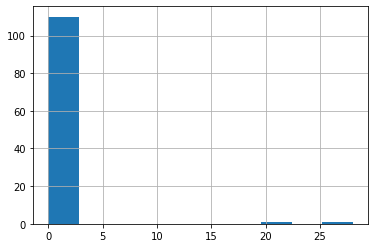

In [14]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count